In [1]:
import cv2
import os
import math
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from scratchai import *
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [2]:
classes = ['20', '30', '50', '60', '70','80', 'end 80', 'Speed limit 100', '120', 'no overtaking',
           'no overtaking for trucks', 'Right of way at intersection', 
              'road with priority', 'give the way', 'STOP', 'stops permitted', 'No trucks', 
              'No entry', 'General caution', 'Dangerous curve left', 'mind the right turn', 'many turns',
              'ruts', 'slippery road', 'narrowing', 'Road work', 'Traffic lights',
               'pedestrians crossing', 'chlidren', 'bicycles', 'Beware of ice', 'wild animals', 
           'end of caution area','turn right', 'turn left', 'go straight', 'go straight or turn right', 
               'go straight or turn left', 'pass by right side', 'pass by left side', 'roundabout',
               'end of no overtaking', 'end of no overtaking for trucks'
              ]

PyTorch

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 22 * 22, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 43)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 22 * 22)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
PATH = './model pytorch.pth'
model_pytorch = Net()
model_pytorch.load_state_dict(torch.load(PATH))
model_pytorch.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=43, bias=True)
)

In [5]:
I1 = imgutils.load_img('00653.png')
i1 = imgutils.get_trf('rz100_cc100_tt_normimgnet')(I1)

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 2401


In [6]:
import torch
def show_class_and_confidence(adv_x):
    confidences = model_pytorch(adv_x.unsqueeze(0))
    class_idx = torch.argmax(confidences, dim=1).item()
    print (classes[class_idx], ' | ', confidences[0,    class_idx].detach().item())

In [25]:
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean.type_as(x)[None,:,None,None]) / self.std.type_as(x)[None,:,None,None]


norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [8]:
img = Image.open("00653.png")
preprocess = transforms.Compose([
   transforms.Resize((100,100)),
   transforms.ToTensor(),
])
img_tensor = preprocess(img)[None,:,:,:]

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 2401


TensorFlow

In [3]:
model_tensorflow=load_model("model tensorflow.h5")

In [4]:
cur_path = os.getcwd()
path = os.path.join(cur_path,'00653.png')
image = Image.open(path)
image = image.resize((100,100))
data = []
image = np.array(image)
#sim = Image.fromarray(image)
data.append(image)
data = np.array(data)

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 2401


## NOISE

pytorch

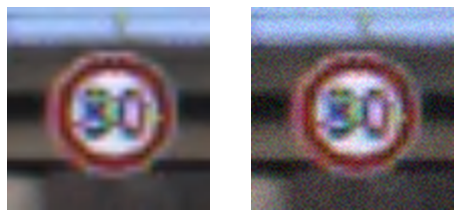

80  |  79.17534637451172
80  |  78.17953491210938


In [56]:
adv_x = attacks.noise(i1)
imgutils.imshow([i1, adv_x], normd=True)
show_class_and_confidence(i1)
show_class_and_confidence(adv_x)

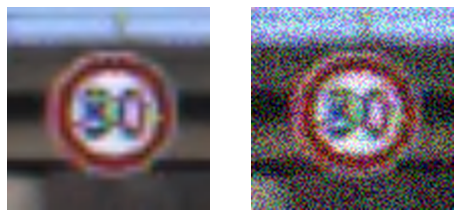

80  |  76.98757934570312


In [59]:
adv_x2 = attacks.noise(i1, eps=1.)
imgutils.imshow([i1, adv_x2], normd=True)
show_class_and_confidence(adv_x2)

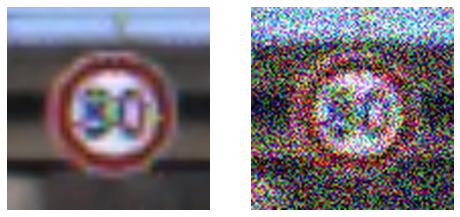

80  |  74.08248901367188


In [79]:
adv_x3 = attacks.noise(i1, eps=2.)
imgutils.imshow([i1, adv_x3], normd=True)
show_class_and_confidence(adv_x3)

Tensorflow

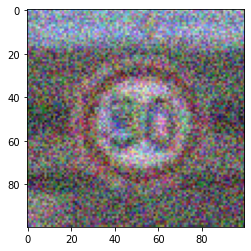

<tf.Tensor: shape=(1, 43), dtype=float32, numpy=
array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        4.25031e-28, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00]], dtype=float32)>

In [106]:
im=[]
for i in range(100):
    l = np.zeros((100,3), np.uint8)
    l=cv2.randu(l,(0),(255)) 
    im.append(l)
im=np.array([im])
test=0.9*im+data
plt.imshow(test[0]/np.max(test[0]))
plt.show()
model_tensorflow(test)

## SEMANTIC

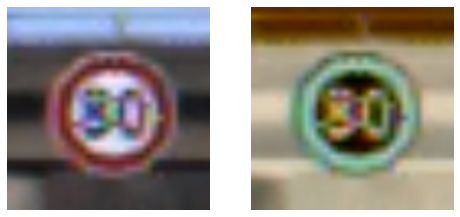

120  |  25.670862197875977


In [133]:
adv_x_sem = attacks.semantic(i1)
imgutils.imshow([i1, adv_x_sem], normd=True)
show_class_and_confidence(adv_x_sem)

## FGSM

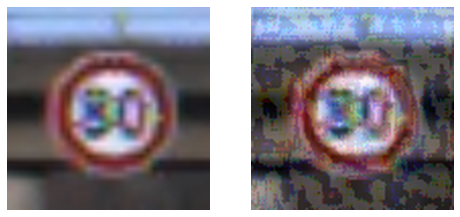

120  |  106.90892028808594


In [134]:
adv_x_fgm = attacks.fgm(i1, model)
imgutils.imshow([i1, adv_x_fgm], normd=True)
show_class_and_confidence(adv_x_fgm)

### FGSM tensorflow

In [6]:
pretrained_model = model_tensorflow
pretrained_model.trainable = False
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [7]:
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (100, 100))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = image[None, ...]
    return image

def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return signed_grad

def display_images(image, eps):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image[0]*0.5+0.5)
    plt.title(eps)
    plt.show()

In [8]:
image_raw = tf.io.read_file('00653.png')
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

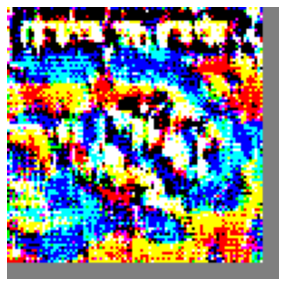

In [11]:
index = 5
label = tf.one_hot(index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(perturbations[0]*0.5+0.5); # To change [-1, 1] to [0,1]

Predicted class:  80
[[0.0000000e+00 1.1382752e-20 4.2456396e-11 2.8063480e-21 2.6439850e-28
  1.0000000e+00 1.3537101e-37 1.0056919e-16 3.1120047e-34 0.0000000e+00
  3.3588118e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  7.7387468e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.9201510e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]


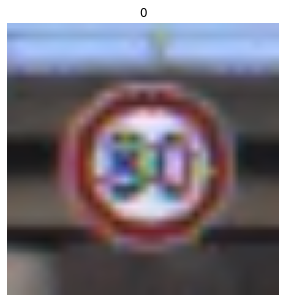

Predicted class:  80
[[0.0000000e+00 1.2990737e-19 8.0414618e-05 3.1064913e-17 1.9493854e-23
  9.9991953e-01 7.6191277e-38 2.0060976e-19 1.4289601e-33 0.0000000e+00
  3.5526977e-38 0.0000000e+00 0.0000000e+00 3.0119394e-38 0.0000000e+00
  4.2172035e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.8006724e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.1792840e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]


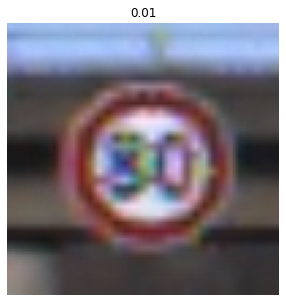

Predicted class:  50
[[0.0000000e+00 6.7202635e-20 5.7204866e-01 1.2714569e-15 5.4060025e-21
  4.2795134e-01 0.0000000e+00 9.2959056e-22 7.1020797e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6661364e-37 0.0000000e+00
  4.4479681e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  5.9084146e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.2238291e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]


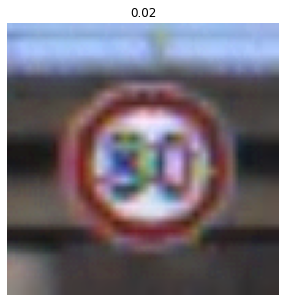

Predicted class:  50
[[0.0000000e+00 3.5641483e-27 1.0000000e+00 3.1068031e-23 3.6508994e-26
  3.1560244e-11 0.0000000e+00 4.7287041e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]


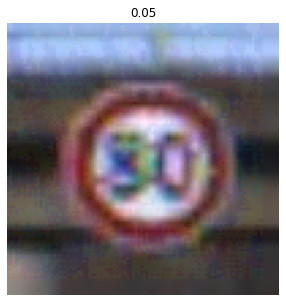

In [14]:
epsilons = [0, 0.01, 0.02, 0.05]

for i, eps in enumerate(epsilons):
    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    print('Predicted class: ', classes[pretrained_model.predict_classes(adv_x)[0]])
    image_probs = pretrained_model.predict(adv_x)
    print(image_probs)
    display_images(adv_x,eps)

## I-FGSM        projected gradient sign/ Iterative-FGSM -  look Adv Robustness

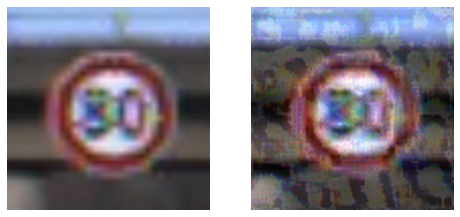

100  |  192.0731964111328


In [135]:
adv_x_ifgm = attacks.pgd(i1, model)
imgutils.imshow([i1, adv_x_ifgm], normd=True)
show_class_and_confidence(adv_x_ifgm[0])

In [144]:
epsilon = 2./255

delta = torch.zeros_like(img_tensor, requires_grad=True)
opt = optim.SGD([delta], lr=1e-1)

for t in range(1500):
    pred = model_pytorch(norm(img_tensor + 3*delta))
    loss = -nn.CrossEntropyLoss()(pred, torch.LongTensor([5]))
    if t % 50 == 0:
        print(t, loss.item())
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    delta.data.clamp_(-epsilon, epsilon)
    
print("True class probability:", nn.Softmax(dim=1)(pred)[0,5].item())

0 -9.536738616588991e-07
50 -9.536738616588991e-07
100 -9.536738616588991e-07
150 -1.0728830375228426e-06
200 -1.0728830375228426e-06
250 -1.0728830375228426e-06
300 -1.1920922133867862e-06
350 -1.1920922133867862e-06
400 -1.1920922133867862e-06
450 -1.311301275563892e-06
500 -1.311301275563892e-06
550 -1.311301275563892e-06
600 -1.4305104514278355e-06
650 -1.4305104514278355e-06
700 -1.5497195136049413e-06
750 -1.5497195136049413e-06
800 -1.6689286894688848e-06
850 -1.6689286894688848e-06
900 -1.7881377516459906e-06
950 -1.9073468138230965e-06
1000 -2.0265558760002023e-06
1050 -2.145764938177308e-06
1100 -2.264974000354414e-06
1150 -2.3841830625315197e-06
1200 -2.50339189733495e-06
1250 -3.099436753473128e-06
1300 -4.172316494077677e-06
1350 -6.437280717364047e-06
1400 -1.3708974620385561e-05
1450 -7.560304641723633
True class probability: 1.5575141522786559e-25


In [145]:
max_class = pred.max(dim=1)[1].item()
print("Predicted class: ", classes[max_class])
print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())

Predicted class:  100
Predicted probability: 1.0


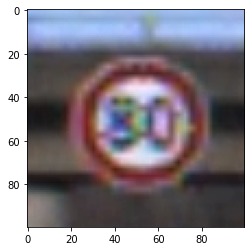

In [146]:
plt.imshow((img_tensor + delta)[0].detach().numpy().transpose(1,2,0))

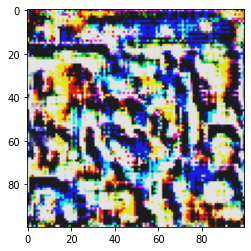

In [147]:
plt.imshow((50*delta+0.5)[0].detach().numpy().transpose(1,2,0))

## T-FGSM

In [148]:
delta = torch.zeros_like(img_tensor, requires_grad=True)
opt = optim.SGD([delta], lr=5e-3)

for t in range(100):
    pred = model(norm(img_tensor + 2*delta))
    loss = (-nn.CrossEntropyLoss()(pred, torch.LongTensor([5])) + 
            nn.CrossEntropyLoss()(pred, torch.LongTensor([3])))
    if t % 10 == 0:
        print(t, loss.item())
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    delta.data.clamp_(-epsilon, epsilon)

0 47.923095703125
10 0.16978836059570312
20 -3.692424774169922
30 -4.452610015869141
40 -4.746570587158203
50 -4.887607574462891
60 -4.964847564697266
70 -5.033824920654297
80 -5.074432373046875
90 -5.0970458984375


In [149]:
max_class = pred.max(dim=1)[1].item()
print("Predicted class: ", classes[max_class])
print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())

Predicted class:  60
Predicted probability: 0.9941871166229248


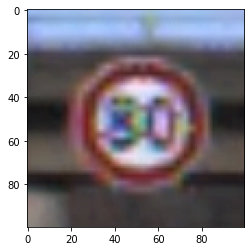

In [150]:
plt.imshow((img_tensor + delta)[0].detach().numpy().transpose(1,2,0))

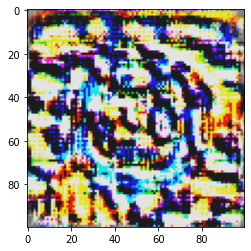

In [151]:
plt.imshow((50*delta+0.5)[0].detach().numpy().transpose(1,2,0))

## ATAK ZNAKU STOP

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 3753


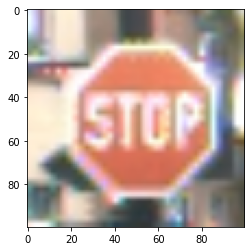

In [32]:
# read the image, resize to 224 and convert to PyTorch Tensor
img = Image.open("true.png")
preprocess = transforms.Compose([
   transforms.Resize((100,100)),
   transforms.ToTensor(),
])
img_tensor = preprocess(img)[None,:,:,:]

# plot image (note that numpy using HWC whereas Pytorch user CHW, so we need to convert)
plt.imshow(img_tensor[0].numpy().transpose(1,2,0))

In [34]:
pred = model_pytorch(norm(img_tensor))
print("Predicted class: ",classes[pred.max(dim=1)[1].item()])
print("Predicted probability:", math.exp(-nn.CrossEntropyLoss()(model_pytorch(norm(img_tensor)),torch.LongTensor([14])).item()))

Predicted class:  STOP
Predicted probability: 0.9999922514562126


In [42]:
epsilon = 2./255
delta = torch.zeros_like(img_tensor, requires_grad=True)
opt = optim.SGD([delta], lr=5e-3)

for t in range(100):
    pred = model_pytorch(norm(img_tensor + 2.2*delta))
    loss = (-nn.CrossEntropyLoss()(pred, torch.LongTensor([14])) + 
            nn.CrossEntropyLoss()(pred, torch.LongTensor([12])))
    if t % 10 == 0:
        print(t, loss.item())
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    delta.data.clamp_(-epsilon, epsilon)

0 31.511289596557617
10 4.958757400512695
20 0.9077129364013672
30 -0.16168212890625
40 -0.5777092576026917
50 -0.7998733520507812
60 -0.9289875030517578
70 -1.0258445739746094
80 -1.0913200378417969
90 -1.1440410614013672


In [43]:
max_class = pred.max(dim=1)[1].item()
print("Predicted class: ", classes[max_class])
print("Predicted probability:", nn.Softmax(dim=1)(pred)[0,max_class].item())

Predicted class:  road with priority
Predicted probability: 0.7650225758552551


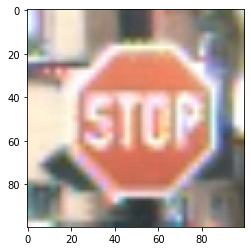

In [44]:
plt.imshow((img_tensor + delta)[0].detach().numpy().transpose(1,2,0))

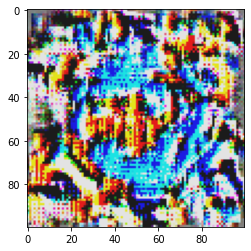

In [45]:
plt.imshow((50*delta+0.5)[0].detach().numpy().transpose(1,2,0))

## ATAK CA≈ÅEGO MODELU

In [2]:
transform = transforms.Compose(
    [transforms.Resize(size=(100,100)),
     transforms.CenterCrop((100,100)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [3]:
dataset = torchvision.datasets.ImageFolder(root='./Train pytorch', 
                                            transform=transform)
trainset, testset = torch.utils.data.random_split(dataset, [31367, 7842])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

In [5]:
PATH = './model pytorch.pth'

In [6]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [7]:
net.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=43, bias=True)
)

In [8]:
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon*sign_data_grad
    return perturbed_image

In [9]:
epsilons = [0, .005, .01, .05, .1, .15, .2]

In [10]:
def test( model, device, test_loader, epsilon ):
    correct = 0
    adv_examples = []
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad = True
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1]
        if init_pred.item() != target.item():
            continue
        loss = F.nll_loss(output, target)
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data
        perturbed_data = fgsm_attack(data, epsilon, data_grad)
        output = model(perturbed_data)
        final_pred = output.max(1, keepdim=True)[1]
        if final_pred.item() == target.item():
            correct += 1
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
    final_acc = correct/float(len(test_loader))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader), final_acc))
    return final_acc, adv_examples

In [11]:
device = torch.device("cpu")

In [12]:
accuracies = []
examples = []
for eps in epsilons:
    acc, ex = test(net, device, testloader, eps)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 7491 / 7842 = 0.9552410099464422
Epsilon: 0.005	Test Accuracy = 6978 / 7842 = 0.8898240244835501
Epsilon: 0.01	Test Accuracy = 6306 / 7842 = 0.8041315990818668
Epsilon: 0.05	Test Accuracy = 2524 / 7842 = 0.3218566692170365
Epsilon: 0.1	Test Accuracy = 853 / 7842 = 0.10877327212445805
Epsilon: 0.15	Test Accuracy = 277 / 7842 = 0.035322621780158124
Epsilon: 0.2	Test Accuracy = 94 / 7842 = 0.011986738077021167


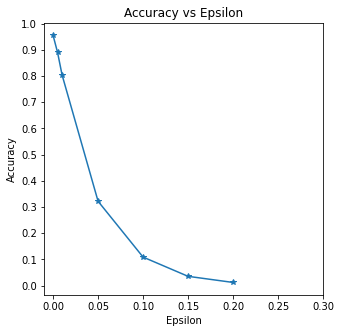

In [13]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

In [14]:
epsilons = [0, 0.01, 0.02, 0.05, 0.1]
examples=['11','16','17','19','26']
fakes=['11o','16o','17o','19o','26o']
d=[]
single_sign_preds=[]
fake=0
for i in (examples):

    for j in epsilons:
        image_raw = tf.io.read_file(i+'.png')
        image = tf.image.decode_image(image_raw)
        image = preprocess(image)
        image_probs = pretrained_model.predict(image)
        index = int(i)
        label = tf.one_hot(index, image_probs.shape[-1])
        label = tf.reshape(label, (1, image_probs.shape[-1]))
        perturbations = create_adversarial_pattern(image, label)
        adv_x = image + j*perturbations
        adv_x = tf.clip_by_value(adv_x, -1, 1)
        d.append(adv_x)
        single_sign_preds.append(adv_x)
        if j==0.1:
            for k in single_sign_preds:
                image_raw = tf.io.read_file(classes[model_tensorflow.predict_classes(k)[0]]+'.png')
                image = tf.image.decode_image(image_raw)
                image = preprocess(image)
                d.append(image)
    single_sign_preds=[]
    fake=fake+1
    print(fake)


1
2
3
4
5


D:\Anaconda3\envs\mgr\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


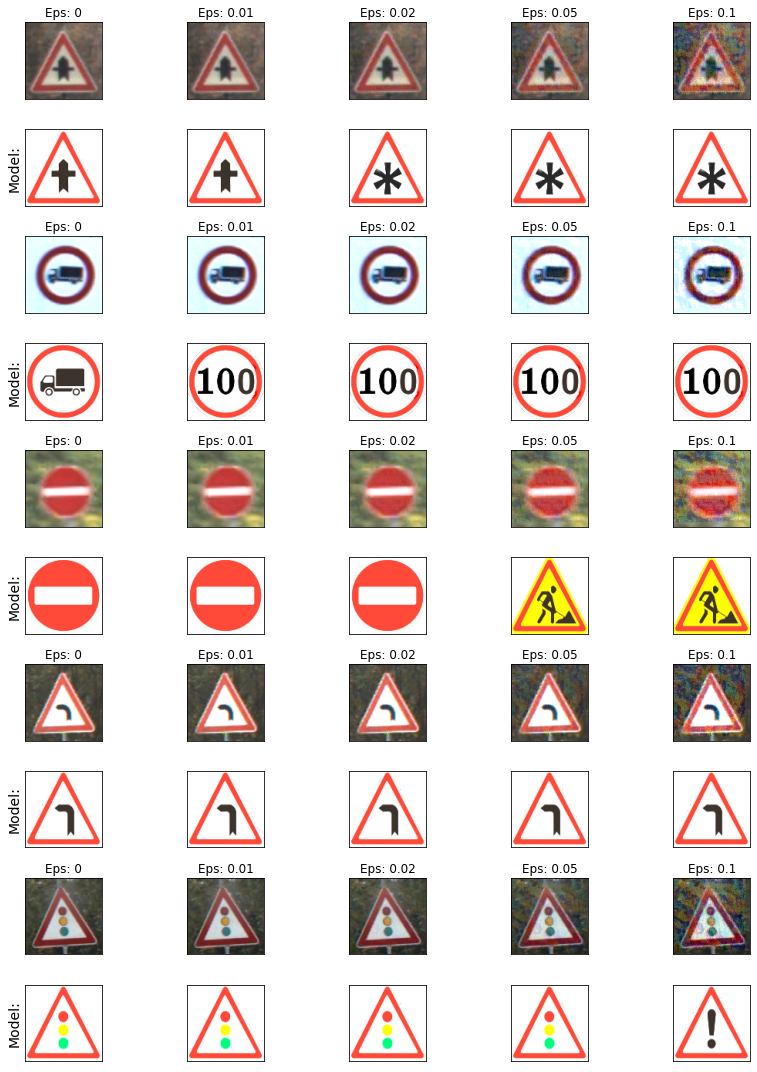

In [21]:
%%capture --no-display
fig=plt.figure(figsize=(12, 15))
epsilons = [0,0.01,0.02,0.05,0.1, 0,0.01,0.02,0.05,0.1, 0,0.01,0.02,0.05,0.1, 0,0.01,0.02,0.05,0.1, 0,0.01,0.02,0.05,0.1,'x','x','x','x','x']
for i in range(1,len(d)+1):
    img = d[i-1]
    fig.add_subplot(10, 5, i)
    plt.xticks([], [])
    plt.yticks([], [])
    if ((i-1)%5 == 0 and (i-1)%10!=0) and i<50:
        plt.ylabel("Model:", fontsize=14)   
    if i<51 and (i-1) in [0,1,2,3,4,10,11,12,13,14,20,21,22,23,24,30,31,32,33,34,40,41,42,43,44]:
        plt.title("Eps: {}".format(epsilons[(i-1)%5]))
        #plt.imshow(img[0]+1)
    
    plt.imshow(img[0]+1)
        
fig.tight_layout()